# 01. Node classification

![images/009.png](images/009.png)

![images/010.png](images/010.png)

# 02. Node Embeddings with TransE

![images/011.png](images/011.png)

![images/012.png](images/012.png)

![images/013.png](images/013.png)

![images/014.png](images/014.png)

![images/015.png](images/015.png)

- [ ] Relational Classication
- [ ] Belief Propagation
- [ ] Warmup: Why the Comparative Loss?
- [ ] The Purpose of the Margin
- [ ] Why are Entity Embeddings Normalized?
- [ ] Where TransE fails

In [1]:
import snap
import numpy as np
import wget
import os
import gzip
from graphviz import Graph
from graphviz import Source
import matplotlib.pyplot as plt

In [2]:
def gz_data_loader(data_url):
    file_to_load = wget.download(data_url)
    filename = os.path.splitext(os.path.basename(data_url))[0]
    os.replace(file_to_load, os.path.join('input', file_to_load))

    with gzip.open(os.path.join('input', file_to_load), 'rb') as f:
        f_in = f.read()
        with open(os.path.join('input', filename), 'wb') as f_out:
            f_out.write(f_in)
            print('\n{} loaded and unpacked'.format(os.path.basename(data_url)))

In [3]:
import hw2

## Relational Classication

In [6]:
G = snap.TUNGraph.New()
for n in range(1, 11):
    G.AddNode(n)
G.AddEdge(1, 2)
G.AddEdge(1, 3)
G.AddEdge(2, 3)
G.AddEdge(2, 4)
G.AddEdge(4, 7)
G.AddEdge(7, 8)
G.AddEdge(4, 8)
G.AddEdge(8, 5)
G.AddEdge(8, 9)
G.AddEdge(3, 6)
G.AddEdge(6, 5)
G.AddEdge(6, 9)
G.AddEdge(9, 5)
G.AddEdge(6, 10)
G.AddEdge(10, 9)

-1

In [7]:
snap.DrawGViz(G, snap.gvlNeato, "images/HW2RelationalClassication.png", "HW2RelationalClassication", True)

![images/HW2RelationalClassication.png](images/HW2RelationalClassication.png)

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [39]:
G1 = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (4, 7), (7, 8), (4, 8), (8, 5), (8, 9), (3, 6), (3, 6), (6, 5), 
        (6, 9), (9, 5), (6, 10), (10, 9)]
G1.add_edges_from(edges)
G1.add_node(3, weight=1)
G1.add_node(5, weight=1)
G1.add_node(8, weight=0)
G1.add_node(10, weight=0)

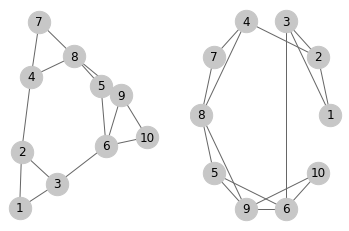

In [32]:
plt.subplot(121)
nx.draw(G1, node_size=500, node_color='#c7c7c7', edge_color='#666666', with_labels=True)
plt.subplot(122)
nx.draw(G1, pos=nx.circular_layout(G1), node_size=500, node_color='#c7c7c7', edge_color='#666666', with_labels=True)

In [45]:
G1.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {'weight': 1}, 4: {}, 7: {}, 8: {'weight': 0}, 5: {'weight': 1}, 9: {}, 6: {}, 10: {'weight': 0}})